# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
# Added two Python utility libraries.
from collections import defaultdict
import itertools

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/Home/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

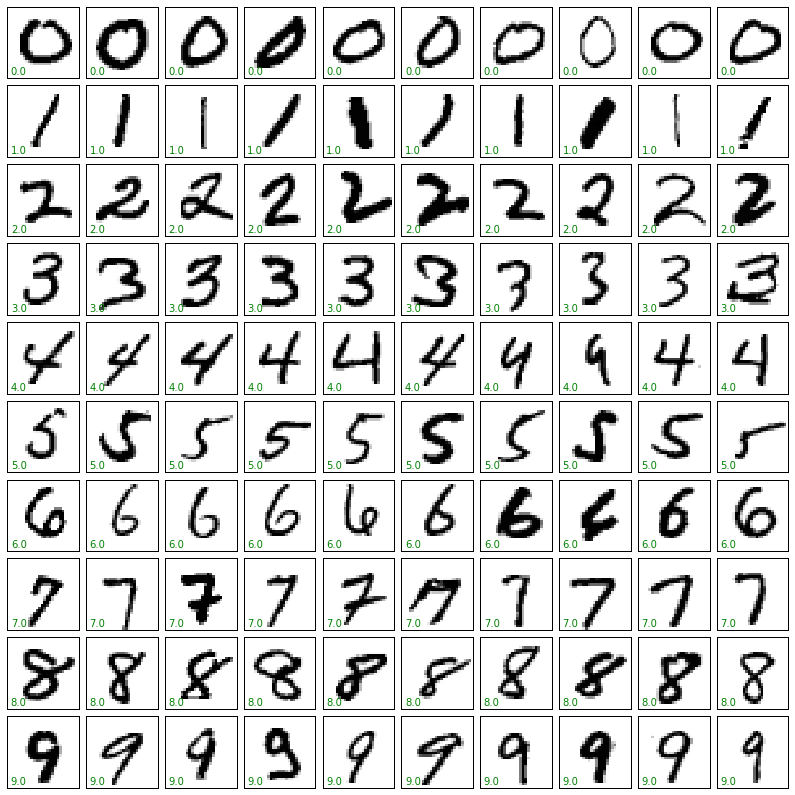

In [3]:
def P1(num_examples=10):

### STUDENT START ###
# Get values of each digit from train_labels
    digits = np.unique(train_labels)
    results = defaultdict(list)
# Loop over train_labels and get index for each digit
    for j in range(len(train_labels)): 
        for k in range(len(digits)):
            if (str(train_labels[j]) == str(digits[k])):
                results[k].append(j)
            
    img_index = []
# Select number of index for each digit based on the number of examples needed.
    for key, value in results.iteritems():    
        img_index+= value [:num_examples]

# Plot 10 examples of each digit.
    fig, axes = plt.subplots(len(digits), num_examples, figsize = (14, 14),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
# Show each digit along with the label as stored in the train_labels  
    for i, ax in enumerate(axes.flat):  
        sample_index = img_index[i]
        ax.imshow(train_data[sample_index].reshape((28,28)), cmap='binary', interpolation='nearest')
        ax.text(0.05, 0.05, str(train_labels[sample_index]),
                                transform=ax.transAxes, color='green')

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###

    y_pred_knn = {}
# Loop over different values of k passed in the method argument.
    for i in k_values:
# Get k-nearest neighbors classifier with different values of number of neighbors.
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_data, train_labels)
# Evaluate k-nearest neighbors classifier for different values of number of neighbors
        print("\nk: %d, accuracy score: %.2f"% (i, knn.score(dev_data, dev_labels)))
        y_pred_knn[i] = knn
# For k =1, show precision, recall, and F1 for each label.
    yfit = y_pred_knn[1].predict(dev_data)
    print("\n\nFor k = 1,  precision, recall, and F1 score for each label:\n")
    print(classification_report(dev_labels, yfit))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)


k: 1, accuracy score: 0.98

k: 3, accuracy score: 0.97

k: 5, accuracy score: 0.97

k: 7, accuracy score: 0.97

k: 9, accuracy score: 0.97


For k = 1,  precision, recall, and F1 score for each label:

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98        99
        1.0       1.00      1.00      1.00       105
        2.0       0.98      0.96      0.97       102
        3.0       0.95      0.97      0.96        86
        4.0       0.99      0.98      0.99       104
        5.0       0.97      0.97      0.97        91
        6.0       0.99      0.98      0.98        98
        7.0       0.99      0.98      0.99       113
        8.0       0.98      0.93      0.95        96
        9.0       0.95      1.00      0.98       106

avg / total       0.98      0.98      0.98      1000



ANSWER: Digit '8',  with lowest recall and f1-score seems to be the most difficult digit.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):
### STUDENT START ###
# Loop over each train size
    for i in range(len(train_sizes)):
# Strat the time counter
        start_time = time.time()
# Get train_data and train_labels for the train_size 
        train_data_p3, train_labels_p3 = train_data[:train_sizes[i]], train_labels[:train_sizes[i]]
# Get k-nearest neighbors classifier for k=1
        knn_p3 = KNeighborsClassifier(n_neighbors=1)
# Fit k-nearest neighbors classifier for the selected train_size
        knn_p3.fit(train_data_p3, train_labels_p3)
# Predict using k-nearest neighbors classifier for dev data
        y_pred_knn = knn_p3.predict(dev_data)
# Measure the amount of time needed for prediction
        total_time = time.time() - start_time
# Get the accuracy score for different train_sizes and append it to the list 'accuracies'
        accuracies.append(round(knn_p3.score(dev_data, dev_labels),2))
        print("\nTraining set size: %2d, Total Time (in seconds): %2.3f, Accuracy score: %2.2f" %(train_sizes[i], total_time, knn_p3.score(dev_data, dev_labels)))     
    return accuracies

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)


Training set size: 100, Total Time (in seconds): 0.111, Accuracy score: 0.72

Training set size: 200, Total Time (in seconds): 0.219, Accuracy score: 0.79

Training set size: 400, Total Time (in seconds): 0.431, Accuracy score: 0.84

Training set size: 800, Total Time (in seconds): 0.848, Accuracy score: 0.88

Training set size: 1600, Total Time (in seconds): 1.809, Accuracy score: 0.90

Training set size: 3200, Total Time (in seconds): 3.589, Accuracy score: 0.93

Training set size: 6400, Total Time (in seconds): 7.447, Accuracy score: 0.94

Training set size: 12800, Total Time (in seconds): 15.490, Accuracy score: 0.96

Training set size: 25000, Total Time (in seconds): 32.533, Accuracy score: 0.97


[0.72, 0.79, 0.84, 0.88, 0.9, 0.93, 0.94, 0.96, 0.97]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
def P4(): 
    
### STUDENT START ###
# trains_sizes and their corresponding accuracies using KNeighborsClassifier for k=1, out put from the Q3 above.
    train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
    accuracies= np.array([0.72, 0.79, 0.84, 0.88, 0.9, 0.93, 0.94, 0.96, 0.97])
# Size n=60000 for prediction using Linear Regression
    predict = [60000]
# Linear Regression classifier fitting the trains_sizes and their corresponding accuracies
    regr = LinearRegression()
    regr.fit(np.asarray(train_sizes).reshape(-1, 1), accuracies)
# Linear Regression classifier prediction for n=60000, without any transformation.
    predict = regr.predict(np.asarray(predict).reshape(-1, 1))
# For n=60000, linear regression predicting accuracy as greater than 1, which is not correct.
    print '\nPrediction using Linear Regression for n=60000, without transformation:  ' , predict

    regr_logit = LinearRegression()
# Using logit transformation to transform training predictions.
    accuracies_logit = np.log(accuracies/ (1 - accuracies))
    regr_logit.fit(np.asarray(train_sizes).reshape(-1, 1), accuracies_logit)
# Linear Regression prediction with model trained with logit dependent variable.
    predict_logit = regr_logit.predict(np.asarray(60000).reshape(-1, 1))
# Inverse of logit transformation for the prediction
    print '\nPrediction using Linear Regression  for n=60000, with Logit transformation: ' , np.exp(predict_logit)/ ( 1 + np.exp(predict_logit)), '\n'
    
### STUDENT END ###

P4()



Prediction using Linear Regression for n=60000, without transformation:   [ 1.24467118]

Prediction using Linear Regression  for n=60000, with Logit transformation:  [ 0.9988599] 



ANSWER: Regression predicts accuracy score, greater than 1, which is not reasonable. <br>
To fix this issue, logit transformation is applied, which keeps the accuracy score between 0 and 1.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [7]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
# Use imshow to render the matrix containing confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
# Formatting for text in the matrix, based on the location.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

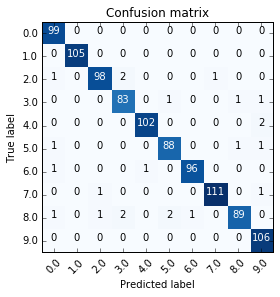



Example mistakes (with mismatched digit text): 



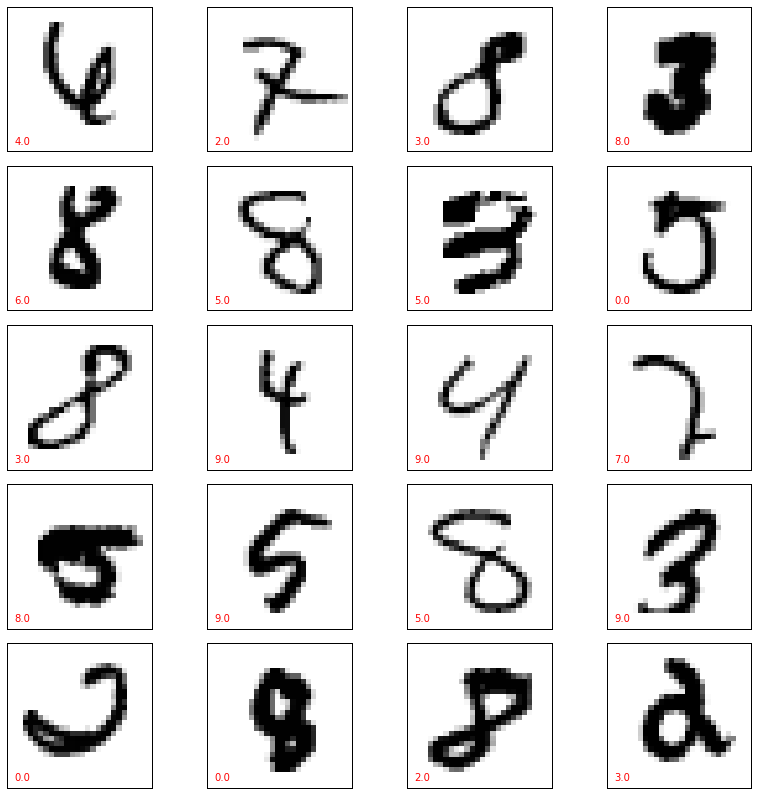

In [8]:
def P5():

### STUDENT START ###
# Get k-nearest neighbors classifier for k=1
    knn_p5 = KNeighborsClassifier(n_neighbors=1)
# Fit k-nearest neighbors classifier to the  train data
    knn_p5.fit(train_data, train_labels)
# Predict using k-nearest neighbors classifier for dev data
    y_pred_knn_p5 = knn_p5.predict(dev_data)
# Generate confusion matrix for the dev data 
    conf_mat = confusion_matrix(dev_labels, y_pred_knn_p5)
    classes = np.unique(train_labels)
# To plot confusion matrix, call the function plot_confusion_matrix with generated confusion matrix
    plot_confusion_matrix(conf_mat, classes,                          
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    plt.show();
# Plot example mistakes with text for mismatched digit 
    print '\n\nExample mistakes (with mismatched digit text): \n'
# Create a 10 x 10 grid using subplot
    fig_p5, axes_p5 = plt.subplots(5, 4, figsize = (14, 14),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
    mismatch_img=[]
    mismatch_text=[]
# Loop through dev_labels
    for j in range(len(dev_labels)):
# Look for mistakes by comaparing model prediction with the dev labels
        if (dev_labels[j] != y_pred_knn_p5[j]):
# Append the mismatched predictions and text
            mismatch_img.append(dev_data[j]) 
            mismatch_text.append(str(y_pred_knn_p5[j]))
# Display example mistakes  using mismatched predictions and text
    for i, ax_p5 in enumerate(axes_p5.flat):
        ax_p5.imshow(mismatch_img[i].reshape((28,28)), cmap='binary', interpolation='nearest')
        ax_p5.text(0.05, 0.05, mismatch_text[i],
            transform=ax_p5.transAxes,
            color='red' )
    
### STUDENT END ###

P5()


ANSWER: There are couple of ties for most confused pair of digits and these are (3 and 8) and  (5 and 8).
<br> Digit '8', also confiremd in Q2 above, seems to be most confused digit.

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

ANSWER:
The equation of a Gaussian function in two dimension is:
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6717136818f2166eba2db0cfc915d732add9c64f", width=200,height=200>
where x is the distance from the origin in the horizontal axis, y is the distance from the origin in the vertical axis, and σ is the standard deviation of the Gaussian distribution. When applied in two dimensions, this formula produces a surface whose contours are concentric circles with a Gaussian distribution from the center point.
<br>Source: http://www.pixelstech.net/article/1353768112-Gaussian-Blur-Algorithm.<br>
This function is used  to calculate weight of each pixel and build a wight matrix.
For example, <br> Image on the left below shows the coordinate of center point(0,0) and the coordinates of neighboring 8 points which are nearest to it.
<br>Image in the center shows weight matrix of blur radius 1 for σ=1.5
<br>Image in the right shows weighted average of the 9 points
<table align = "left">
<tr> 
<td>
<img src="http://image.beekka.com/blog/201211/bg2012111410.png", width=250,height=250>
</td>
<td>
<img src="http://image.beekka.com/blog/201211/bg2012111411.png", width=250,height=250>
</td>
<td>
<img src="http://image.beekka.com/blog/201211/bg2012111412.png", width=250,height=250>
</td>
</tr>
</table>


In [9]:
# Function to get weights for each points using Gaussian function formula for 2 dimensions as described above 
def getweights(x, y, sigma):
    return ( ( 1 / ( 2 * np.pi * (np.power(sigma, 2))) )  * np.exp(  - (  np.power(x, 2) + np.power(y, 2) ) / ( 2 * (np.power(sigma, 2) )  ) )    ) 

# Function to calculate a weight matrix with weight returned by Gaussian function.
def get_weight_matrix(sigma=1.5):
# Calculate weights for corner points: (-1, 1), (1,1), (-1,-1), (1,-1) using just one point (-1, 1) since weights for all the corner points will be the same.
    corner = getweights(-1, 1, 1.5)
# Calculate weights for edge points: (0, 1), (-1,0), (1,0), (0,-1) using just one point (-1, 0) since weights for all the edge points will be the same.    
    edge = getweights(-1, 0, 1.5)
# Calculate weights for center points: (0, 0) 
    center = getweights(0, 0, 1.5)
# Get the total weight by mupltiplying the number of points on corner ans edges and then summing them with weight od center point.
    total_weight = (4 * corner + 1 * center + 4* edge)
# Calculate wighted average of corner points
    corner_weighted = corner / total_weight
# Calculate wighted average of edge points
    edge_weighted = edge / total_weight
# Calculate wighted average of center point
    center_weighted = center / total_weight
# Store the weighted average of center, corner and edge points in a weight matrix at their corrsponding positions.
    weight_matrix = [[corner_weighted,edge_weighted,corner_weighted],
                     [edge_weighted,center_weighted,edge_weighted],
                     [corner_weighted,edge_weighted,corner_weighted]
                    ]
    return weight_matrix

In [10]:
# Function to implement simplified Gaussian blur using the weight matrix//
def simplified_gaussian_blur(data):
# Array to store each image temporarily
    temp= np.zeros((28,28))
# Output data with the same shape as data to apply the blur.
    data_output = np.zeros((data.shape))
# Get weight matrix from the function get_weight_matrix with sigma=1.5
    weight_matrix = get_weight_matrix(sigma=1.5)
# Loop through all the rows 
    for i in range(data.shape[0]):
# Store each image on temp array
        temp = data[i].reshape((28,28))
# Make a copy of to make actual changes
        temp_copy = data[i].reshape((28,28)).copy()
# Loop through each pixel in the image
        for j in range(temp.shape[0]):
# Ignore the pixels in the first and last row as they are mostly zero values
            if (j not in (0, (temp.shape[0] -1)) ) :
# Loop through each image to get individual pixels
                for k in range(temp.shape[1]):
# Ignore the pixels in the first and last column as they are mostly zero values
                    if (k not in (0, (temp.shape[1] -1) ) ) :
# Replace the pixel value with the weighted average calculated with mupltiplying weight matrix
                        temp_copy[j, k] = np.sum(np.array([  temp[j-1, k-1] , temp[j-1, k], temp[j-1, k+1],
                                           temp[j, k-1], temp[j, k], temp[j, k+1],
                                           temp[j+1, k-1], temp[j+1, k], temp[j+1, k+1]
                                     ]) .reshape((3,3)) * weight_matrix)
# Reshape the blurred image back to original and store into the data_output                        
        data_output[i] =  temp_copy.reshape((1,784))
    return data_output

Baseline Accuracy Score: 0.9770
Accuracy score when training data is preprocessed but not the dev data: 0.9810
Accuracy score when dev data is preprocessed but not the training data: 0.9630
Accuracy score when both training and dev data are preprocessed: 0.9780

Some examples of blurred digits:



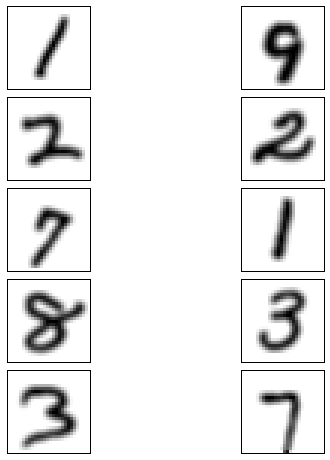

In [30]:
def P6():
    
### STUDENT START ###
# Get k-nearest neighbors classifier for k=1
    knn = KNeighborsClassifier(n_neighbors=1)
# Fit train data and train labels to the KNN model with raw data to estimate the baseline accuracy score.    
    knn.fit(train_data, train_labels)
    print("Baseline Accuracy Score: %.4f"% knn.score(dev_data, dev_labels))
# Estimate accuracy score when training data is preprocessed (with Gaussian blur) but not the dev data     
    knn.fit(simplified_gaussian_blur(train_data), train_labels)
    print("Accuracy score when training data is preprocessed but not the dev data: %.4f"% knn.score(dev_data, dev_labels))
# Estimate accuracy score when dev data is preprocessed (with Gaussian blur) but not the training data         
    knn.fit(train_data, train_labels)
    print("Accuracy score when dev data is preprocessed but not the training data: %.4f"% knn.score(simplified_gaussian_blur(dev_data), dev_labels))
# Estimate accuracy score when both training and  dev data are preprocessed with Gaussian blur    
    knn.fit(simplified_gaussian_blur(train_data), train_labels)
    print("Accuracy score when both training and dev data are preprocessed: %.4f"% knn.score(simplified_gaussian_blur(dev_data), dev_labels))
# Print some examples of digit images blurred using the function simplified_gaussian_blur above.   
    print("\nSome examples of blurred digits:\n")
    fig, axes = plt.subplots(5, 2, figsize = (8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for i, ax in enumerate(axes.flat):
        ax.imshow(simplified_gaussian_blur(mini_train_data)[i].reshape((28,28)), cmap='binary', interpolation='nearest')
    
### STUDENT END ###

P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [32]:
# Function to get binarize threshold for BernoulliNB, which ise used to map the pixel values to either 0 or 1.
def get_binarize_threshold(binarize_values):
# Use GridSearchCV to conduct exhaustive search over specified binarize parameter values for BernoulliNB estimator.
    grid = GridSearchCV(BernoulliNB(alpha=0.0001), [binarize_values])
    grid.fit(train_data , train_labels)
# Loop through each binarize value and print the BernoulliNB Accuracy Score
    for i in range(len(binarize_values['binarize'])):  
        print 'BernoulliNB Accuracy Score: %.4f when binarize threshold = %s' %(grid.grid_scores_[i][1], grid.grid_scores_[i][0]['binarize'] )
# Get the best value for binarize threshold using best_params_ attribute.
    print '\nBest value for binarize threshold = %s with accuracy score: %.4f\n' %( grid.best_params_['binarize'], grid.best_score_)
    return grid

binarize_values = {'binarize': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.5]}
nb = get_binarize_threshold(binarize_values)

BernoulliNB Accuracy Score: 0.8354 when binarize threshold = 0.1
BernoulliNB Accuracy Score: 0.8370 when binarize threshold = 0.15
BernoulliNB Accuracy Score: 0.8365 when binarize threshold = 0.2
BernoulliNB Accuracy Score: 0.8367 when binarize threshold = 0.25
BernoulliNB Accuracy Score: 0.8373 when binarize threshold = 0.3
BernoulliNB Accuracy Score: 0.8372 when binarize threshold = 0.35
BernoulliNB Accuracy Score: 0.8368 when binarize threshold = 0.4
BernoulliNB Accuracy Score: 0.8368 when binarize threshold = 0.45
BernoulliNB Accuracy Score: 0.8369 when binarize threshold = 0.5

Best value for binarize threshold = 0.3 with accuracy score: 0.8373



In [12]:
# Function to map the pixel values to 0, 1, or 2, representing white, grey, or black using supplied thresholds for black and gray.
def ternarize_mnist(data, thresholds=[0.7, 0.3]):
    ternarized_data = np.zeros(data.shape)
    threshold_data = np.ones(data.shape[1]) 
# Loop through data to get to each pixel value
    for feature in range(data.shape[1]):
        for row in range(data.shape[0]):
# Compare pixel value with the threshold for black and if it's greater than the black thresold, map pixel value to 2.
            if ( data[row ,feature] > (threshold_data[feature] * thresholds[0])):
                ternarized_data[row,feature] = np.array([2])
# Compare pixel value with the threshold for gray and if it's greater than the gray thresold, map pixel value to 1.
            elif ( data[row,feature] > (threshold_data[feature] * thresholds[1])):
                ternarized_data[row,feature] = np.array([1])            
    return ternarized_data

ternarized_train_data = ternarize_mnist(train_data)
ternarized_mini_train_data = ternarize_mnist(mini_train_data)
ternarized_test_data = ternarize_mnist(test_data)
ternarized_dev_data = ternarize_mnist(dev_data)

In [13]:
# Function to get thresholds for MultinomialNB, which is used to map the pixel values to 0, 1 or 2.
def get_mutinomial_threshold(black, gray):     
    alpha = 0.01
# Get black and gray threshold value pair and loop through each pair of values
    for blk, gry in zip(black, gray):
# Map the pixel values to 0, 1, or 2 using the function ternarize_mnist
        ternarized_train_data = ternarize_mnist(train_data, thresholds= [blk, gry])
        ternarized_dev_data = ternarize_mnist(dev_data, thresholds= [blk, gry])
# Fit the MultinomialNB model with the mapped train_data
        clf_mnb = MultinomialNB(alpha=alpha)
        clf_mnb.fit(ternarized_train_data , train_labels)
# Get MultinomialNB accuracy score for each pair of black and gray threshold values
        print 'MultinomialNB Accuracy Score with [%3.2f, %3.2f] :%3.4f' %( blk, gry, clf_mnb.score(ternarized_dev_data, dev_labels))

black = [0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
gray = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
get_mutinomial_threshold(black, gray)

MultinomialNB Accuracy Score with [0.90, 0.10] :0.8260
MultinomialNB Accuracy Score with [0.85, 0.15] :0.8250
MultinomialNB Accuracy Score with [0.80, 0.20] :0.8270
MultinomialNB Accuracy Score with [0.75, 0.25] :0.8340
MultinomialNB Accuracy Score with [0.70, 0.30] :0.8300
MultinomialNB Accuracy Score with [0.65, 0.35] :0.8290
MultinomialNB Accuracy Score with [0.60, 0.40] :0.8300
MultinomialNB Accuracy Score with [0.55, 0.45] :0.8270
MultinomialNB Accuracy Score with [0.45, 0.55] :0.8260
MultinomialNB Accuracy Score with [0.40, 0.60] :0.8290
MultinomialNB Accuracy Score with [0.35, 0.65] :0.8250
MultinomialNB Accuracy Score with [0.30, 0.70] :0.8290
MultinomialNB Accuracy Score with [0.25, 0.75] :0.8220
MultinomialNB Accuracy Score with [0.20, 0.80] :0.8240
MultinomialNB Accuracy Score with [0.15, 0.85] :0.8220
MultinomialNB Accuracy Score with [0.10, 0.90] :0.8190


In [14]:
def P7():

### STUDENT START ###
    alpha = 0.0001
# BernoulliNB model using the best binarize threshold obtained from the function get_binarize_threshold above. 
    clf_bnb = BernoulliNB(alpha=alpha, binarize=0.35)
    clf_bnb.fit(train_data , train_labels)
    print '\nBernoulliNB accuracy score: %3.4f' %clf_bnb.score(dev_data, dev_labels)
# MultinomialNB modelusing the best threshold values for black and gray using the fucntion get_mutinomial_threshold
    clf_mnb = MultinomialNB(alpha=alpha)
    clf_mnb.fit(ternarized_train_data , train_labels)
    print '\nMultinomialNB accuracy score: %3.4f' %clf_mnb.score(ternarized_dev_data, dev_labels)

### STUDENT END ###

ternarized_train_data = ternarize_mnist(train_data, thresholds=[0.75, 0.25])
ternarized_dev_data = ternarize_mnist(dev_data, thresholds=[0.75, 0.25])

P7()


BernoulliNB accuracy score: 0.8500

MultinomialNB accuracy score: 0.8340


ANSWER: Before fitting Naive Bayes classifiers - BernoulliNB and MultinomialNB to dev data, thresolds are calculated so as to get best values to map 0 or 1 for BernoulliNB and 0, 1 or 2 for MultinomialNB.
<br>Multi-class version doesn't seem to improve results from Bernoulli NB binary class version.
<br>The reason for this is that digits don't seem to differ in intensity level of gray scale. 


(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [33]:
def P8(alphas):

### STUDENT START ###
# Creae a GridSearchCV with BernoulliNB and supplied appha values. binarize=0.31 is taken from earlier question to get binarize threshold.
    grid = GridSearchCV(BernoulliNB(binarize=0.35), [alphas])
# Fit the GridSearchCV with tain data and train labels
    grid.fit(train_data , train_labels)
# Print the best value of aplha using GridSearchCV attributes grid.best_params_ and grid.best_score_
    print 'Best value for alpha = %s with accuracy score: %.4f' %( grid.best_params_['alpha'], grid.best_score_)
# Get the accuracy whne alpha =0 
    print 'The accuracy when alpha = %s is %.4f' %(grid.grid_scores_[0][0]['alpha'], grid.grid_scores_[0][1] )
    return grid

    
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

#print nb.best_params_

Best value for alpha = 0.0001 with accuracy score: 0.8372
The accuracy when alpha = 0.0 is 0.0989


ANSWER: The accuracy when alpha=0 is 0.0989. The very low accuracy is expected since alpha = 0 corresponds to no smoothing and this results in not being able to account for features not present in the learning samples and fails to prevent zero probabilities in further computations.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [22]:
def P9():

### STUDENT END ###

    clf_gnb = GaussianNB()
# Fit GaussianNB to real valued features in train_data.
    clf_gnb.fit(train_data, train_labels)
# Get GaussianNB accuracy score for real-valued features.
    print '\nGaussianNB baseline accuracy score for real-valued features: %3.2f' %clf_gnb.score(dev_data, dev_labels)
# Make a simple fix to sigma value(variance of each feature per class) and set it to 1.  
    for i in range(clf_gnb.sigma_.shape[0]):
        clf_gnb.sigma_[i, :] = 1
# Get GaussianNB accuracy score after applying the fix (setting sigma value to 1)
    print '\nGaussianNB accuracy score, after applying the fix: %3.2f\n' %clf_gnb.score(dev_data, dev_labels)
    

### STUDENT END ###

gnb = P9()


GaussianNB baseline accuracy score for real-valued features: 0.57

GaussianNB accuracy score, after applying the fix: 0.81



ANSWER: GuassianNB using real-valued features predicts with low accuracy (for dev_data it's 0.57).
Upon looking into mean and variance of the fitted model, it reveals that variance( and standard deviation) of features is very low and applying  a simple fix to the variance, by settting it to 1, returns the accuracy to 0.81 (for dev_data), which is very close to BernoulliNB(0.84) for the same set of data.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

BernoulliNB model accuracy score: 0.84


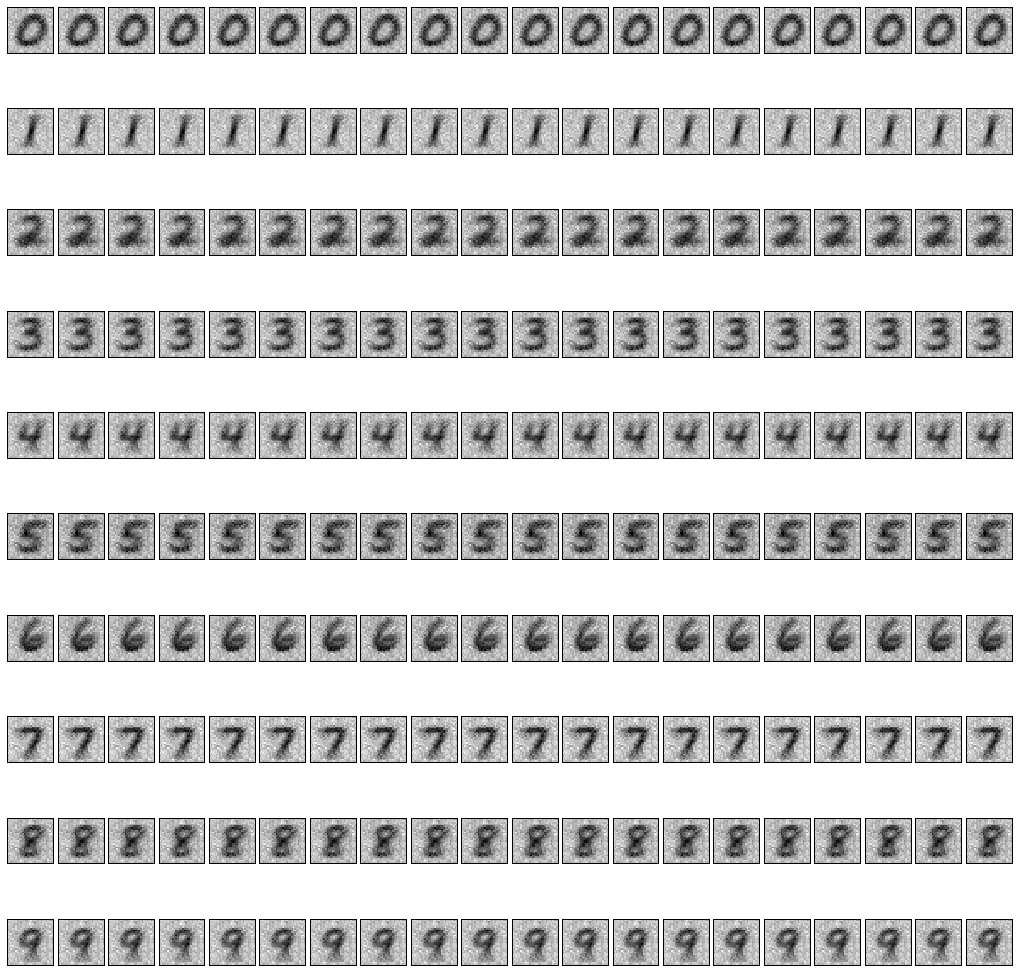

In [17]:
def P10(num_examples):

### STUDENT START ###
# Train a BernoulliNB model with aplha and binarize threshold values obtained through earlier questions using GridSearchCV.
    alpha = 0.0001
    clf_bnb = BernoulliNB(alpha=alpha, binarize=0.31)
    clf_bnb.fit(train_data , train_labels)
# Get estimated log probabality of each pixel and using np.exp() convert it back to probability.
    feature_probs = np.exp(clf_bnb.feature_log_prob_)
# Get the accuracy score for trained BernoulliNB model.
    print 'BernoulliNB model accuracy score: %3.2f' %clf_bnb.score(test_data, test_labels)
# Repeat elements of estimated probabality to for each digits to the number of examples needed
    digit_probs = np.repeat(feature_probs, num_examples, axis =0)
# Generate random noise and add it to the estimated probabality to make it look like real life digits.
    digits_probs_with_noise = digit_probs + np.random.randn(784) *.1
# Create subplot grid of the size: number of digits times number of examples.
    fig, axes = plt.subplots(10, num_examples, figsize = (18, 18),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
# Dispaly digit in the grid using imshow and cmap as binary for BernoulliNB model with ouput as either 0 or 1  
    for i, ax in enumerate(axes.flat):  
        ax.imshow(digits_probs_with_noise[i].reshape((28,28)), cmap='binary', interpolation='nearest')
        

### STUDENT END ###

P10(20)

ANSWER:  The added random noise to generated digits make them look blurred and pixels, muddy all around.  
<br> However, for generated digits, they all look quite similar to each other whereas training digits look quite different from each other, notably due to fact that training digits were created by humans with varying level of hand-writing skills. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [18]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    alpha_v = 0.0001
    binarize_v=0.35
# Train BernoulliNB model with alpah and binarize thrrshold as obtained from GridSearchCV in earlier questions.
    clf_bnb = BernoulliNB(alpha=alpha_v, binarize=binarize_v)
    clf_bnb.fit(train_data , train_labels)
    print '\nBernoulliNB model accuracy score: %3.2f\n' %clf_bnb.score(dev_data, dev_labels)
# Get probability estamtes for dev_data
    posteriors = clf_bnb.predict_proba(dev_data)
# Get prediction for dev_data
    predictions = clf_bnb.predict(dev_data)
# Loop through all the rows of probablity estiamte for dev_data 
    for i in range(posteriors.shape[0]):
# Get max posterior
        max_posterior = np.max(posteriors[i])
# Loop through all the values of buckets and find the value which is equal to or greter than max posterior.
        for j in range(len(buckets)):
            if buckets[j] >= max_posterior:
# Increment total count for this bucket value and values after that.
                for k in range(j, len(buckets)):
                    total[k] += 1
# Check if prediction for this correct. If it is correct then increment correct count for this index and index afterwards    
                if predictions[i] == dev_labels[i]:
                    for k in range(j, len(buckets)):
                        correct[k] +=1
# Once total and correct count is incremented, get out of the loop
                break;
    return correct, total
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

correct, total = P11(buckets, correct, total)
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = 1.0 * (correct[i]) / (total[i])
    print 'p(pred) <= %.13f    total = %3d    accuracy = %3.2f' %(buckets[i], total[i], accuracy)
print '\n'


BernoulliNB model accuracy score: 0.85

p(pred) <= 0.5000000000000    total =   1    accuracy = 0.00
p(pred) <= 0.9000000000000    total =  40    accuracy = 0.60
p(pred) <= 0.9990000000000    total = 131    accuracy = 0.53
p(pred) <= 0.9999900000000    total = 203    accuracy = 0.54
p(pred) <= 0.9999999000000    total = 264    accuracy = 0.58
p(pred) <= 0.9999999990000    total = 327    accuracy = 0.62
p(pred) <= 0.9999999999900    total = 382    accuracy = 0.66
p(pred) <= 0.9999999999999    total = 460    accuracy = 0.70
p(pred) <= 1.0000000000000    total = 1000    accuracy = 0.85




ANSWER: Looking at the result, the calibration for the Naive Bayes mode seems to be weakly calibrated.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

ANSWER: For this question, I implemented a feature suggesested in this research paper <a href= "http://www.mecs-press.org/ijisa/ijisa-v8-n8/IJISA-V8-N8-5.pdf" > On the Performance of Classification Techniques with Pixel Removal Applied to Digit Recognition</a>.<br>
The idea is to trim the outermost pixel values or frames from the digits and measure its impact on the accuracy of categorizations using different classification techniques.
<br>In this question, three classfication techniuqes were used:<br>
1. Bernoulli naive bayes<br>
2. Gaussian naive bayes<br>
3. k-nearest neighbors <br>

The digits are trimmed ten times, each time taking out the outer most pixels or frames. <br>For example, as depicted in the figure below, first trim will remove the pixels in the yeallow frame, whereas second trim will take out the pixels in red frame.


<img src="https://github.com/MSannat/W207/raw/master/w207_q12.png", width=500,height=500>
<br><br>
Each successive trim will reduce the number of pixels by this formula: 
10^2 + 8 * (2 - x) , x=1,2,3...10, where x is number of trimmed frames.
So first trim will remove 10^2 + 8 * (2 - 1) = 108 pixels and change the digits from the size (28x28) to (26x26). 
<table align = "center">
<tr> 
<h1>
<td>
Trim cycle
</td>
<td>
Number of pixels
</td>
<td>
Digit dimensions
</td>
</h1>
</tr>
<tr>
<td>
0
</td>
<td>
784
</td>
<td>
28 x 28
</td>

<tr>
<td>
1
</td>
<td>
676
</td>
<td>
26 x 26
</td>


<tr>
<td>
2
</td>
<td>
576
</td>
<td>
24 x 24
</td>



<tr>
<td>
3
</td>
<td>
484
</td>
<td>
22 x 22
</td>



<tr>
<td>
4
</td>
<td>
400
</td>
<td>
20 x 20
</td>



<tr>
<td>
5
</td>
<td>
324
</td>
<td>
18 x 18
</td>


<tr>
<td>
6
</td>
<td>
256
</td>
<td>
16 x 16
</td>

<tr>
<td>
7
</td>
<td>
196
</td>
<td>
14 x 14
</td>

<tr>
<td>
8
</td>
<td>
144
</td>
<td>
12 x 12
</td>

<tr>
<td>
9
</td>
<td>
100
</td>
<td>
10 x 10
</td>

<tr>
<td>
10
</td>
<td>
64
</td>
<td>
&nbsp;8 x 8
</td>



</tr>
</table>

In [20]:
# Function to get the index of pixels in the outermost frame
def pixel_index_to_trim(d=28):
    trim_pixel= []
# Get the top row of outermost frame
    for i in range(d):
        trim_pixel.append(i)
# Get the two side rows of outermost frame
    for i in range(d-2):
        trim_pixel.append(0 + (i+1) * d)
        trim_pixel.append((d-1) + (i+1) * (d))
    end_trim = range(d*(d-1) ,  (d*(d-1) +d))
# Get the bottom row of outermost frame
    for i in range(len(end_trim)):
        trim_pixel.append(end_trim[i])
    return trim_pixel 


############################ Baseline data and scores #####################################


Original training data shape:  (60000, 784)

Original Image size : ( 28 x 28 )

BernoulliNB baseline accuracy score: 0.8500

GaussianNB baseline accuracy score for real-valued features: 0.5710

KNeighborsClassifier baseline accuracy score: 0.9770

###########################################################################################


Trimming cycle: 1

training data shape after trimming: (60000, 676)

Image size after trimming: ( 26 x 26 )

BernoulliNB accuracy score: 0.8510

GaussianNB baseline accuracy score for real-value features: 0.5660

KNeighborsClassifier accuracy score: 0.9770

************************* Digit Images after trim : 1 **********************************



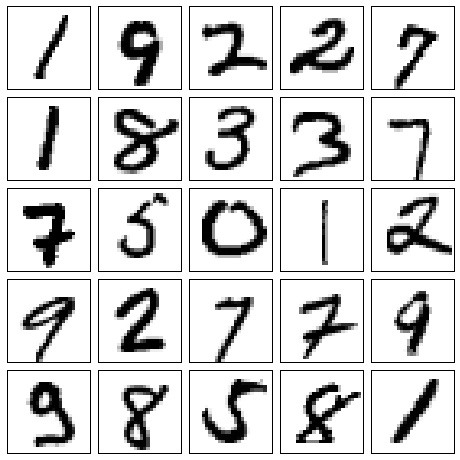


###########################################################################################


Trimming cycle: 2

training data shape after trimming: (60000, 576)

Image size after trimming: ( 24 x 24 )

BernoulliNB accuracy score: 0.8450

GaussianNB baseline accuracy score for real-value features: 0.5950

KNeighborsClassifier accuracy score: 0.9760

************************* Digit Images after trim : 2 **********************************



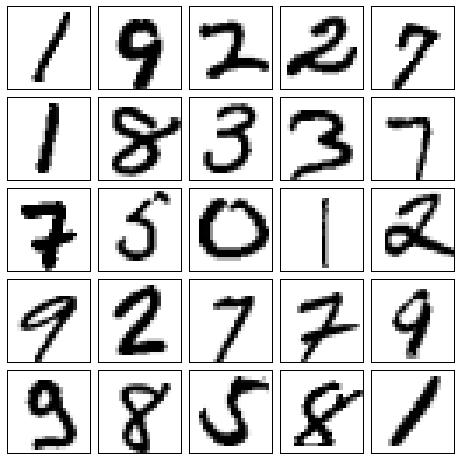


###########################################################################################


Trimming cycle: 3

training data shape after trimming: (60000, 484)

Image size after trimming: ( 22 x 22 )

BernoulliNB accuracy score: 0.8430

GaussianNB baseline accuracy score for real-value features: 0.6580

KNeighborsClassifier accuracy score: 0.9750

************************* Digit Images after trim : 3 **********************************



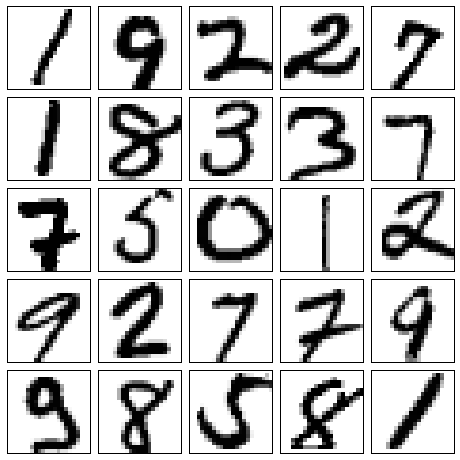


###########################################################################################


Trimming cycle: 4

training data shape after trimming: (60000, 400)

Image size after trimming: ( 20 x 20 )

BernoulliNB accuracy score: 0.8340

GaussianNB baseline accuracy score for real-value features: 0.7540

KNeighborsClassifier accuracy score: 0.9760

************************* Digit Images after trim : 4 **********************************



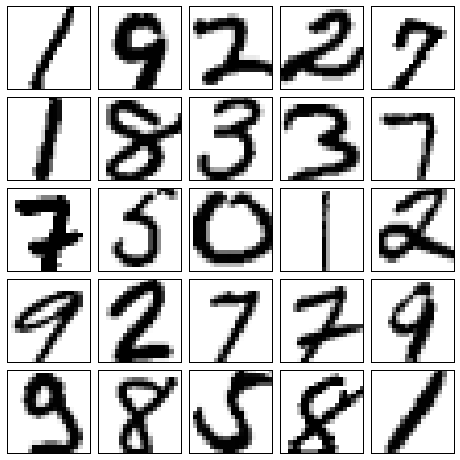


###########################################################################################


Trimming cycle: 5

training data shape after trimming: (60000, 324)

Image size after trimming: ( 18 x 18 )

BernoulliNB accuracy score: 0.8320

GaussianNB baseline accuracy score for real-value features: 0.7900

KNeighborsClassifier accuracy score: 0.9740

************************* Digit Images after trim : 5 **********************************



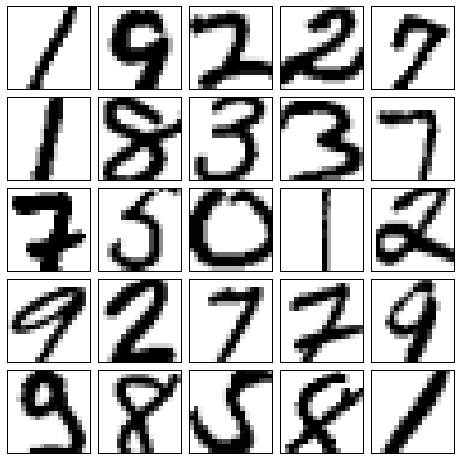


###########################################################################################


Trimming cycle: 6

training data shape after trimming: (60000, 256)

Image size after trimming: ( 16 x 16 )

BernoulliNB accuracy score: 0.8300

GaussianNB baseline accuracy score for real-value features: 0.8130

KNeighborsClassifier accuracy score: 0.9670

************************* Digit Images after trim : 6 **********************************



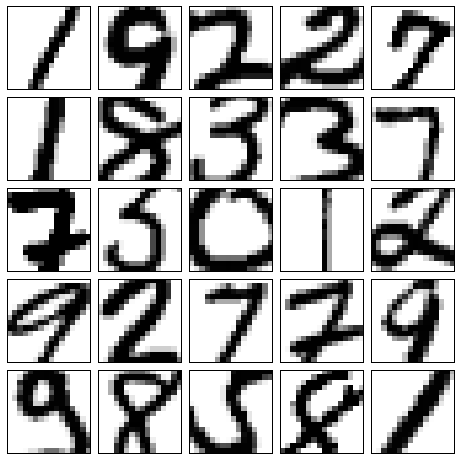


###########################################################################################


Trimming cycle: 7

training data shape after trimming: (60000, 196)

Image size after trimming: ( 14 x 14 )

BernoulliNB accuracy score: 0.8130

GaussianNB baseline accuracy score for real-value features: 0.8110

KNeighborsClassifier accuracy score: 0.9540

************************* Digit Images after trim : 7 **********************************



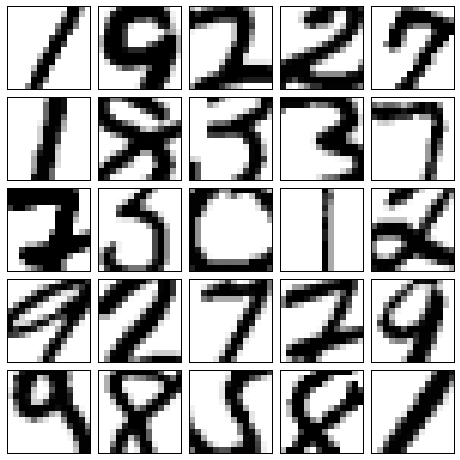


###########################################################################################


Trimming cycle: 8

training data shape after trimming: (60000, 144)

Image size after trimming: ( 12 x 12 )

BernoulliNB accuracy score: 0.7590

GaussianNB baseline accuracy score for real-value features: 0.7660

KNeighborsClassifier accuracy score: 0.9280

************************* Digit Images after trim : 8 **********************************



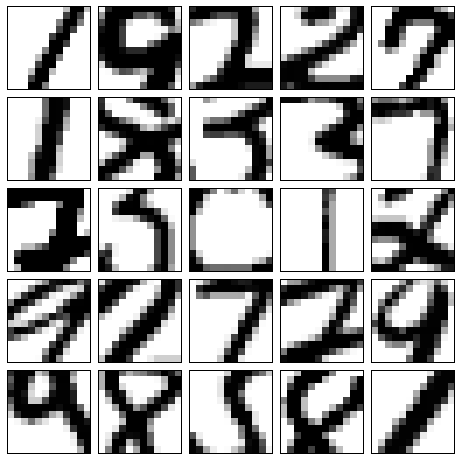


###########################################################################################


Trimming cycle: 9

training data shape after trimming: (60000, 100)

Image size after trimming: ( 10 x 10 )

BernoulliNB accuracy score: 0.6830

GaussianNB baseline accuracy score for real-value features: 0.6980

KNeighborsClassifier accuracy score: 0.8780

************************* Digit Images after trim : 9 **********************************



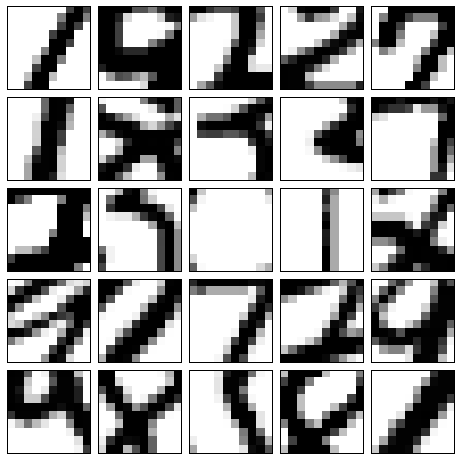


###########################################################################################


Trimming cycle: 10

training data shape after trimming: (60000, 64)

Image size after trimming: ( 8 x 8 )

BernoulliNB accuracy score: 0.6120

GaussianNB baseline accuracy score for real-value features: 0.6200

KNeighborsClassifier accuracy score: 0.7890

************************* Digit Images after trim : 10 **********************************



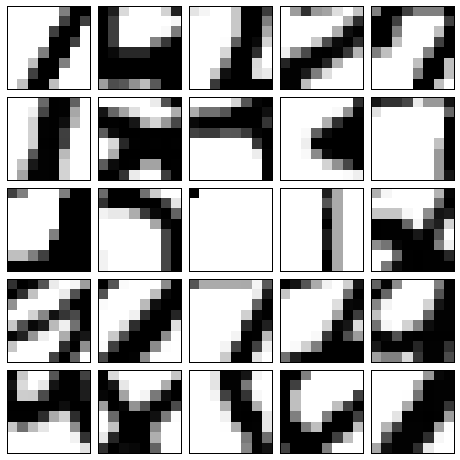


###########################################################################################



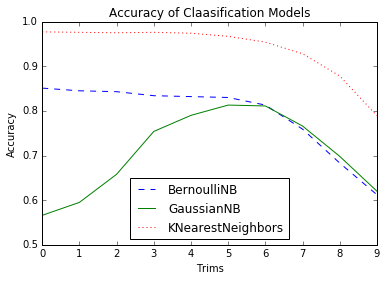

In [31]:
def P12():

### STUDENT START ###
    # alpha and binarize values for Benoullin NB
    alpha = 0.001
    binarize=0.35

    # Number of frame trims
    num_trims =10
    # Make copy of train and dev data for trimming
    train_data_trim = train_data.copy()
    dev_data_trim = dev_data.copy()

    # Numebr of row and features for train data
    num_features = train_data_trim.shape[1]
    num_rows = train_data_trim.shape[0]

    # Original digit size (d x d)
    d=int(np.sqrt(train_data.shape[1]))

    # Numebr of row and features for dev data
    num_features_dev = dev_data_trim.shape[1]
    num_rows_dev = dev_data_trim.shape[0]

    trim_pixels = []
    # Placeholders to keep classifier accuracy for each trim, to be used for plotting
    bernoulliNB_accuracy = np.zeros([num_trims])
    gaussianNB_accuracy = np.zeros([num_trims])
    knn_accuracy = np.zeros([num_trims])

    # Baseline data and scores
    print '\n############################ Baseline data and scores #####################################\n'
    print  '\nOriginal training data shape: ' ,train_data.shape
    print '\nOriginal Image size : (', int(np.sqrt(train_data.shape[1])), 'x', int(np.sqrt(train_data.shape[1])) ,')'

    clf_bnb = BernoulliNB(alpha=alpha, binarize=binarize)
    clf_bnb.fit(train_data , train_labels)
    print '\nBernoulliNB baseline accuracy score: %3.4f' %clf_bnb.score(dev_data, dev_labels)

    clf_gnb = GaussianNB()
    clf_gnb.fit(train_data, train_labels)
    print '\nGaussianNB baseline accuracy score for real-valued features: %3.4f' %clf_gnb.score(dev_data, dev_labels)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(train_data, train_labels)
    print("\nKNeighborsClassifier baseline accuracy score: %3.4f"% knn.score(dev_data, dev_labels))

    print '\n###########################################################################################\n'

    # Loop through number of trims
    for i in range(num_trims):
        print '\nTrimming cycle:' , i+1
    # Call function pixel_index_to_trim with matrix dimension of the digit 
        trim_pixels = pixel_index_to_trim(d)
    # Get number of features remaining after the trim
        num_features -=len(trim_pixels)
    # Placeholders to keep trimmed data for train and dev    
        temp_data_training = np.zeros([num_rows, num_features])
        temp_data_dev = np.zeros([num_rows_dev, num_features])
        print '\ntraining data shape after trimming:', temp_data_training.shape
        print '\nImage size after trimming: (', int(np.sqrt([num_features])), 'x', int(np.sqrt([num_features])) ,')'
    # Loop through train data and delete features from the outermost frame   
        for j in range(train_data_trim.shape[0]):
            temp_data_training[j] = np.delete(train_data_trim[j], trim_pixels)
    # Loop through dev data and delete features from the outermost frame           
        for k in range(dev_data_trim.shape[0]):
            temp_data_dev[k] = np.delete(dev_data_trim[k], trim_pixels)

    #  Train a BernoulliNB model and estimate accuracy for the trimmed digits 
        clf_bnb = BernoulliNB(alpha=alpha, binarize=binarize)
        clf_bnb.fit(temp_data_training , train_labels)
        bern_accuracy = clf_bnb.score(temp_data_dev, dev_labels)
        bernoulliNB_accuracy[i] = bern_accuracy
        print '\nBernoulliNB accuracy score: %3.4f' %bern_accuracy

    #  Train a GaussianNB model and estimate accuracy for the trimmed digits    
        clf_gnb = GaussianNB()
        clf_gnb.fit(temp_data_training, train_labels)
        gauss_accuracy = clf_gnb.score(temp_data_dev, dev_labels)
        gaussianNB_accuracy[i] = gauss_accuracy
        print '\nGaussianNB baseline accuracy score for real-value features: %3.4f' % gauss_accuracy

    #  Train a KNeighborsClassifier model and estimate accuracy for the trimmed digits      
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(temp_data_training, train_labels)
        knn_acc = knn.score(temp_data_dev, dev_labels)
        knn_accuracy[i] = knn_acc
        print("\nKNeighborsClassifier accuracy score: %3.4f"% knn_acc)

    # Plot the trimmed digits    
        print '\n************************* Digit Images after trim :', i+1 ,'**********************************\n' 
        fig, axes = plt.subplots(5, 5, figsize = (8, 8),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

        for x, ax in enumerate(axes.flat):
            ax.imshow(temp_data_training[x].reshape((int(np.sqrt([num_features])), int(np.sqrt([num_features])))), cmap='binary', interpolation='nearest')
        plt.show()
        trim_pixels= []
        train_data_trim = temp_data_training
        dev_data_trim = temp_data_dev
        d -=2

        print '\n###########################################################################################\n'    
# Plots for all three models' accuracy scores for each trim   
    trim_num = range(num_trims)
    plt.plot(trim_num, np.array(bernoulliNB_accuracy), label="BernoulliNB", linestyle='--')
    plt.plot(trim_num, np.array(gaussianNB_accuracy), label="GaussianNB", linestyle='-')
    plt.plot(trim_num, np.array(knn_accuracy), label="KNearestNeighbors", linestyle=':')
    plt.xlabel("Trims")
    plt.ylabel("Accuracy")
    plt.xlim((0, 9))
    plt.ylim((0.5, 1.0))
    plt.legend(loc="best")
    plt.title("Accuracy of Claasification Models")
    # Render the plots.
    plt.show()

### STUDENT END ###

P12()

Results:<br>
As shown in the figure above (please scroll down to plot at the bottom), Gaussian NB model's accuracy score improved with each trim from baseline score of 0.57 to 0.81 after the sixth trim, after that it's accuracy went down with each successive trims.
<br>BernoulliNB and K Nearest Neighbours model's accuracy score remained  remained almost unchanged from baseline score and trim 4 strarted going down with each successive trim.
<br>Overall, pixel removal in outer frames of digits, seemed to be a good apprach to improve accuracy of Gaussian NB models for digit recognition.